# **PRÁCTICA 2: AUTOENCODERS - Parte 2: Convolucionales**
### Universitat de València, Escola Tecnica Superior d'Enginyeria
### Elena Marrero Castellano | 4ª curso del Grado Ciencia de Datos

## **Ejercicio 4: Modifica la arquitectura para que funcione con cifar 10**
---

In [1]:
from keras.datasets import cifar10
from keras.layers import Input, Dense,Conv2D,MaxPooling2D,UpSampling2D,BatchNormalization
from tensorflow.keras.optimizers import Adam
from keras.models import Model,Sequential
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(X_train, _), (X_test, _) = cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [3]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

X_train = X_train.reshape(len(X_train),X_train.shape[1],X_train.shape[2],3)
X_test = X_test.reshape(len(X_test), X_test.shape[1],X_test.shape[2],3)

In [4]:
print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [5]:
input_img = Input(shape=(32,32,3))

#Encoder
x = Conv2D(16,(3,3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2,2), padding='same')(x)

x = Conv2D(8,(3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2), padding='same')(x)

x = Conv2D(8,(3,3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2,2), padding='same', name='encoder')(x)

#Decoder
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

x = Conv2D(16, (3, 3), activation='relu',padding='same')(x)
x = UpSampling2D((2, 2))(x)

decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

In [6]:
opt = Adam(learning_rate=0.0001)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=opt, loss='mse')

In [7]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 8)           584   

In [8]:
# ENTRENAMIENTO
from keras.callbacks import TensorBoard

autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Epoch 1/50
196/196 [==============================] - 12s 16ms/step - loss: 0.0579 - val_loss: 0.0418
Epoch 2/50
196/196 [==============================] - 2s 12ms/step - loss: 0.0334 - val_loss: 0.0293
Epoch 3/50
196/196 [==============================] - 2s 13ms/step - loss: 0.0280 - val_loss: 0.0269
Epoch 4/50
196/196 [==============================] - 2s 12ms/step - loss: 0.0262 - val_loss: 0.0255
Epoch 5/50
196/196 [==============================] - 2s 12ms/step - loss: 0.0249 - val_loss: 0.0243
Epoch 6/50
196/196 [==============================] - 2s 12ms/step - loss: 0.0238 - val_loss: 0.0234
Epoch 7/50
196/196 [==============================] - 2s 12ms/step - loss: 0.0230 - val_loss: 0.0227
Epoch 8/50
196/196 [==============================] - 2s 13ms/step - loss: 0.0224 - val_loss: 0.0221
Epoch 9/50
196/196 [==============================] - 2s 13ms/step - loss: 0.0218 - val_loss: 0.0216
Epoch 10/50
196/196 [==============================] - 3s 17ms/step - loss: 0.0214 - val_l

In [9]:
predicted = autoencoder.predict(X_test)

313/313 [==============================] - 1s 2ms/step


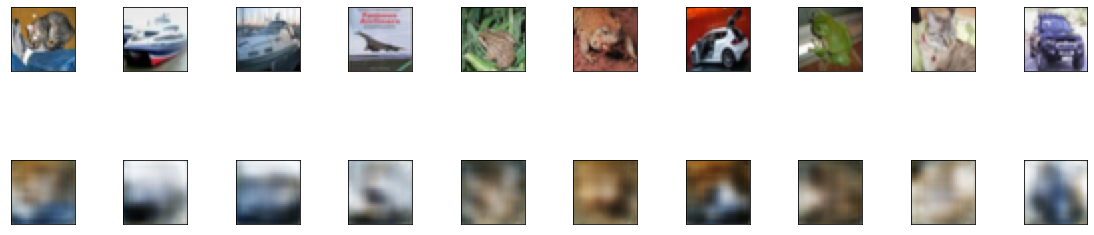

In [10]:
plt.figure(figsize=(40,4))
for i in range(10):
    # display original images
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(X_test[i].reshape(32, 32,3))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstructed images
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(predicted[i].reshape(32, 32,3))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
   
plt.show()